# 你只需要修改下面这一个格子中的三个数据

In [1]:
# 项目的开始日期，修改单引号中的内容
start_time = '2018-12-01'

# 项目的结束日期，修改单引号中的内容
end_time = '2018-12-07'

# excel文件的路径，修改单引号中的内容
excel_path = '/Users/kingname/Desktop/test.xlsx'

# 下面的内容你不需要做任何修改

In [2]:
import pandas as pd
df = pd.read_excel(excel_path, header=1)

In [3]:
import datetime

start_time_obj = datetime.datetime.strptime(start_time, '%Y-%m-%d')
end_time_obj = datetime.datetime.strptime(end_time, '%Y-%m-%d')

In [4]:
work_load = df.loc[df.index[0]].sum()
work_load

25.0

In [5]:
date_list = []
data_list = []
for day in range((end_time_obj - start_time_obj).days + 1):
    date_list.append(start_time_obj + datetime.timedelta(days=day))
    data_list.append(work_load * (1 - day / ((end_time_obj - start_time_obj).days)))

In [6]:
import numpy as np
class Task(object):

    __slots__ = ['start_date', 'end_date', 'day_remain_hour_dict', 'task_name', 'date_list']

    def __init__(self, name):
        self.task_name = name
        self.start_date = None
        self.end_date = None
        self.date_list = []
        self.day_remain_hour_dict = {}

    def get_reamined_hour(self, date):
        if self.end_date and date >= self.end_date:
            return 0
        return self.day_remain_hour_dict[date]

    def set_day_remain_hour(self, date, remain_hour):
        if np.isnan(remain_hour):
            remain_hour = self.day_remain_hour_dict[self.date_list[-1]]
        self.day_remain_hour_dict[date] = remain_hour
        if remain_hour <= 0:
            self.end_date = date
        self.date_list.append(date)

    def __repr__(self):
        return f'task_name: {self.task_name}, end at: {self.end_date}'
        

In [7]:
task_obj_list = []
def prepare_task_obj(task_df):
    task_name_list = task_df.columns.values
    date_delta = (task_df.index[-1] - task_df.index[0]).days
    for task_name in task_name_list:
        task_series = task_df[task_name]
        if task_series.isnull().all():
            continue
        task_obj = Task(task_name)
        for date in date_list:
            if date not in task_df.index:
                task_obj.set_day_remain_hour(date, task_obj.get_reamined_hour(task_obj.date_list[-1]))
            else:
                task_obj.set_day_remain_hour(date, task_series.loc[date])
        task_obj_list.append(task_obj)

In [8]:
prepare_task_obj(df)

In [9]:
remain_hour_list = []
for date in date_list:
    remain_hour_list.append(sum([x.day_remain_hour_dict[date] for x in task_obj_list]))
remain_hour_list

[25.0, 15.0, 19.0, 13.0, 13.0, 6.0, 6.0]

Text(0.5,0,'date')

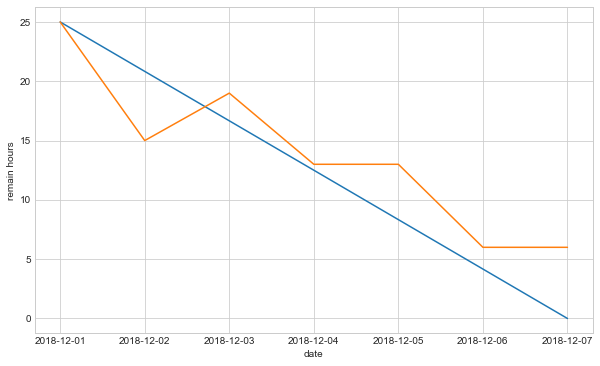

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(date_list, data_list)
plt.plot(date_list, remain_hour_list)
plt.ylabel('remain hours')
plt.xlabel('date')